In [1]:
#Tensorflow and tf.keras


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)


2.4.1


In [2]:
#Define Constants
batch_size = 128
epochs = 100
num_classes = 10

In [3]:
#Download MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_images), len(test_images)

(60000, 10000)

In [5]:
# normalize the input image so that each pixel value is between 0 to 1
train_images = train_images /  255.0
test_images = test_images /  255.0

In [6]:
#define the model architecture
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(num_classes, activation='softmax')])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')

In [9]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3593 - accuracy: 0.9011
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1683 - accuracy: 0.9524
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1187 - accuracy: 0.9667
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0919 - accuracy: 0.9736
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0744 - accuracy: 0.9781
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0607 - accuracy: 0.9828
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0505 - accuracy: 0.9856
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0424 - accuracy: 0.9876
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0354 - accuracy: 0.9906
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0298 - accura

In [7]:
#Evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 2.3211 - accuracy: 0.1467
Test Accuracy:  0.14069999754428864


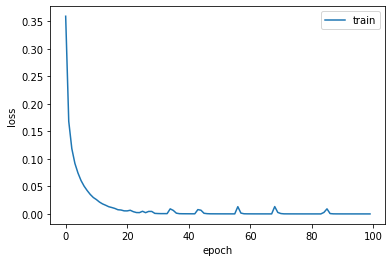

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'])
plt.show()

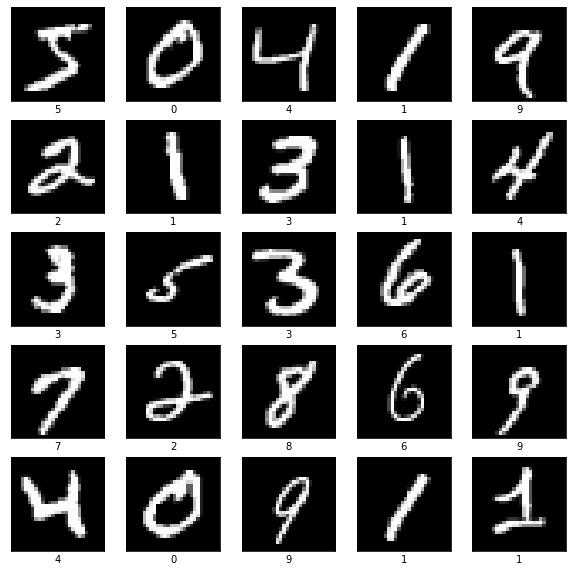

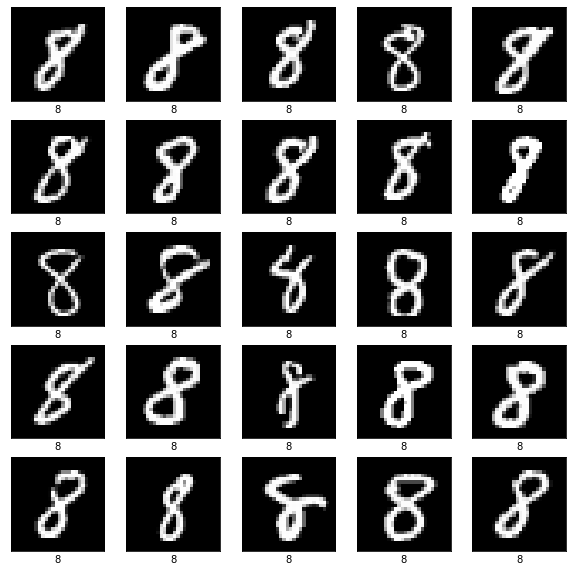

In [11]:
#https://colab.research.google.com/github/tensorflow/examples/blob/master/lite/examples/digit_classifier/ml/mnist_tflite.ipynb
#helper function to display digit images
def show_sample(images, labels, sample_count=25):
  #create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  
  plt.show()

show_sample(train_images, train_labels)


#helper function to display digit specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  #create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))

  i = 0;
  digit_count = 0;

  while digit_count < sample_count:
    i += 1
    if(digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

show_sample_digit(train_images, train_labels, 8)


#helper function to display digit specific digit images
def show_digit_image(image):
  #draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  #major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)

  #and a corresponding grid
  ax.grid(which='both')

  #or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)

  plt.imshow(image, cmap=plt.cm.binary)
  plt.show()




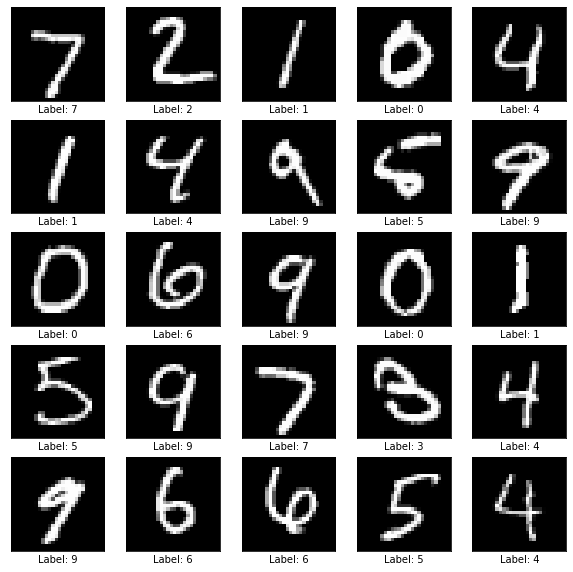

In [12]:
#show the first 25 images in the training dataset
show_sample(test_images, ['Label: %s' % label for label in test_labels])

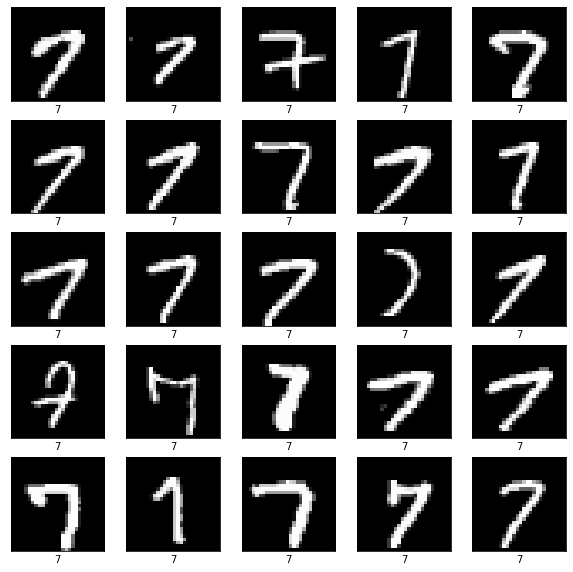

In [13]:
#show digit 7 the first 25 images in the training dataset
show_sample_digit(train_images, train_labels, 7)

Text(0, 0.5, 'accuracy')

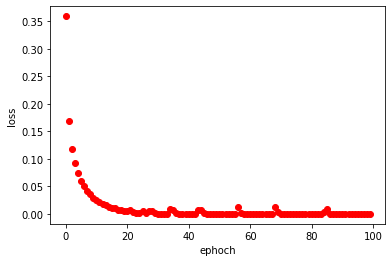

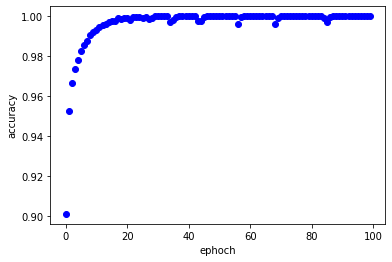

In [14]:
#evalate the model using test dataset. show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro')
loss_ax.set_xlabel('ephoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['accuracy'], 'bo')
acc_ax.set_xlabel('ephoch')
acc_ax.set_ylabel('accuracy')


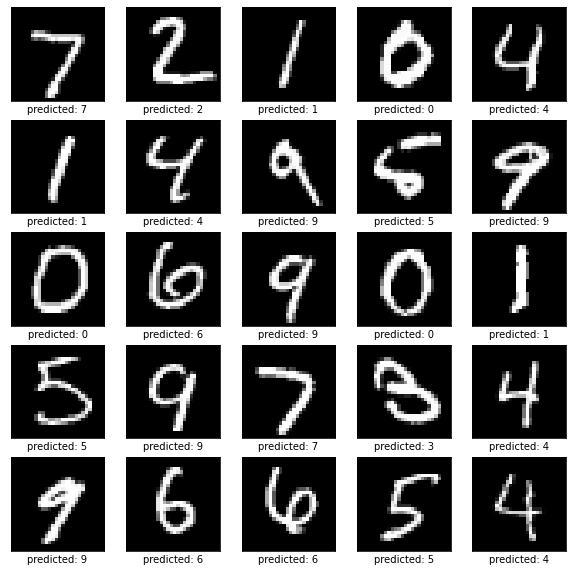

In [15]:
#predict the labels of disit images and their predicted labels.
predictions = model.predict(test_images)
show_sample(test_images, ['predicted: %d' % np.argmax(result) for result in predictions])

In [34]:
Digit = 198 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = Digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)

print('Number is %2d' % result_number)

show_digit_image(test_images[selected_digit])

IndexError: ignored

In [42]:
#https://developers.google.com/machine-learning/glossary
#CNN define the model architecture

from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

#채널 차원을 늘림
#normalize the input image so that each pixel value is between 0 to 1
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

#keras model create
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

#define the model architecture with cnn
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

filepath = '/model/digits_model.h5'
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 57s 37ms/step - loss: 0.4432 - accuracy: 0.8603 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 2/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0800 - accuracy: 0.9757 - val_loss: 0.0448 - val_accuracy: 0.9874
Epoch 3/20
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0403 - val_accuracy: 0.9883
Epoch 4/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0434 - accuracy: 0.9866 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 5/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0361 - val_accuracy: 0.9908
Epoch 6/20
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0374 - val_accuracy: 0.9908
Epoch 7/20
1500/1500 [==============================] - 56s 38ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0413 -

In [44]:
#colab에서 download하기
def download(path):
  try:
    from google.colab import files
    files.download(path)
  except ImportError:
    import os
    print('Error download: ', os.path.join(os,getcwd(), path))

download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
model.summary()

!ls -al

#model save & model load
savefile = 'saved_digits.h5'
model.save(savefile)

load_model = keras.models.load_model(savefile)

load_model.summary()

loss, acc = load_model.evaluate(val_scaled, val_target, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

print(load_model.predict(val_scaled).shape)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

375/375 [==============================] - 4s 11ms/step - loss: 0.0332 - accuracy: 0.9911
Test accuracy:  0.9910833239555359


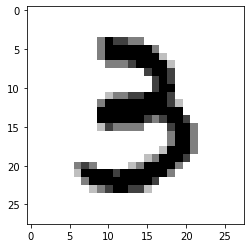

[[1.2235232e-19 1.5121931e-11 2.6177465e-13 3.6487086e-10 2.6373609e-10
  8.1889939e-11 4.4628313e-18 1.0000000e+00 4.4610739e-12 1.1484292e-08]]


In [41]:
test_loss, test_acc = model.evaluate(val_scaled, val_target)
print('Test accuracy: ', test_acc)

#predict the labels of disit images and their predicted labels.
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.show()

predictions = model.predict(val_scaled[0:1])
print(predictions)

